# DNA Damage model formation & Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [3]:
warnings.filterwarnings(action = 'ignore')

## 1. Preparing Cell Painting Data & Cell Health Data

### Load IDR-0080 Data & Cell Health Data
### Reference : https://pubmed.ncbi.nlm.nih.gov/33534641/

In [3]:
x_df = pd.read_csv('x_df.csv', index_col = None)
x_df = x_df.iloc[:, 1:]
x_df

,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_Orientation,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_3_3,Cells_AreaShape_Zernike_4_0,...,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_ER_5_0,Nuclei_Texture_SumEntropy_Mito_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_AGP_5_0,Nuclei_Texture_SumVariance_DNA_10_0,Nuclei_Texture_SumVariance_DNA_5_0,Nuclei_Texture_Variance_AGP_5_0,Nuclei_Texture_Variance_DNA_10_0,Nuclei_Texture_Variance_DNA_5_0
0,-0.155631,0.014646,0.188053,1.231056,0.031064,-0.585477,0.467976,0.254203,0.129446,0.027104,...,0.882859,0.841687,0.339831,0.562585,0.879950,0.904785,0.923143,0.944998,0.984938,0.961945
1,-0.247842,-0.030773,0.433778,0.062456,0.266860,0.838679,-0.467417,0.340793,-0.024450,0.418928,...,0.513820,0.344554,0.134318,0.018933,0.359496,0.557998,0.504751,0.407462,0.522251,0.519441
2,0.794740,0.743296,-0.438752,0.827288,-0.728499,-0.422394,-0.147624,0.083870,-0.160722,-0.363004,...,-0.456539,0.373750,-0.111184,-0.042733,-0.840771,-0.536215,-0.497296,-0.748232,-0.515240,-0.526734
3,0.480421,0.821096,-0.337898,0.054479,-0.662314,0.067979,0.025010,0.158138,-0.342062,-0.434783,...,0.115466,0.186411,0.249292,0.688435,-0.521766,0.124801,0.063444,-0.560178,-0.062851,0.026056
4,-0.074895,0.569377,0.571678,0.976504,-1.111947,1.348542,0.584906,-3.128483,-2.324773,1.945741,...,0.154802,2.975785,1.128414,-0.638839,0.753884,0.808944,0.594059,0.674015,0.140325,0.417465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.247953,0.331462,-0.228694,0.648857,-0.394799,-0.477804,-0.203016,0.387554,0.485502,-0.302333,...,0.305814,0.952718,0.697652,0.087784,0.266722,0.254346,0.367875,0.191115,0.220894,0.257950
353,1.455427,1.153796,-1.395398,1.167778,-1.413069,-0.684198,-0.923160,-0.145706,-0.535382,0.224011,...,-0.207834,-0.280317,-0.422648,-0.763835,-0.254697,-0.380000,-0.404530,-0.266026,-0.341998,-0.287431
354,0.719510,0.691270,-0.999921,0.701489,-0.965601,-0.937154,-0.218680,0.145943,-0.149745,-0.637266,...,0.011171,-0.575574,-0.272102,-0.101586,-0.117305,-0.083261,-0.085342,-0.213054,-0.126822,-0.101668
355,-0.255658,0.075113,0.999995,0.251456,0.237111,0.342004,0.084765,0.957639,-0.562746,-0.409896,...,0.766721,0.518347,1.450779,1.421830,1.483743,0.639279,0.614153,1.624128,0.523767,0.603819


In [14]:
# Load cell health data
y_all_df = pd.read_csv('cell_health_modz.tsv', sep = '\t')
y_df = y_all_df['vb_ros_mean']
y_f = y_all_df[['vb_ros_mean']]

### Load Chemical Annotation Data
### Reference : https://gigadb.org/dataset/100351

In [4]:
# Chemical annotation 
chem_dat = pd.read_csv('chemical_annotations.csv')
chem_dat

,BROAD_ID,CPD_NAME,CPD_NAME_TYPE,CPD_SAMPLE_ID,DOS_LIBRARY,SOURCE_NAME,CHEMIST_NAME,VENDOR_CATALOG_ID,CPD_SMILES,USERCOMMENT
0,BRD-A56675431-001-04-0,altizide,INN,SA82748,NaN,Prestwick Chemical Inc.,NaN,Prestw-721,NS(=O)(=O)c1cc2c(NC(CSCC=C)NS2(=O)=O)cc1Cl,NaN
1,BRD-A51829654-001-01-4,"BRL-15,572",common,SA82481,NaN,Biomol International Inc.,NaN,AC-536,OC(CN1CCN(CC1)c1cccc(Cl)c1)C(c1ccccc1)c1ccccc1,NaN
2,BRD-K04046242-001-03-6,equilin,primary-common,SA82922,NaN,Prestwick Chemical Inc.,NaN,Prestw-850,C[C@]12CC[C@H]3C(=CCc4cc(O)ccc34)[C@@H]1CCC2=O,NaN
3,BRD-K16508793-001-01-8,diazepam,INN,SA59660,NaN,MicroSource Discovery Systems Inc.,NaN,1900003,CN1c2ccc(Cl)cc2C(=NCC1=O)c1ccccc1,NaN
4,BRD-K09397065-001-01-6,SR 57227A,to-be-curated,SA82504,NaN,Biomol International Inc.,NaN,AC-561,NC1CCN(CC1)c1cccc(Cl)n1,NaN
...,...,...,...,...,...,...,...,...,...,...
30611,BRD-K47092271-001-01-7,BRD-K47092271,BROAD_CPD_ID,SA799574,Benzofuran Library,Broad Institute of MIT and Harvard,NaN,NaN,COCC(=O)Nc1ccc2O[C@@H]3[C@@H](C[C@H](CC(=O)NCC...,NaN
30612,BRD-K30358777-001-01-0,BRD-K30358777,BROAD_CPD_ID,SA800605,Benzofuran Library,Broad Institute of MIT and Harvard,NaN,NaN,COc1ccc(CNC(=O)C[C@@H]2C[C@H]3[C@H](Oc4ccc(NC(...,NaN
30613,BRD-K32423836-001-01-9,BRD-K32423836,BROAD_CPD_ID,SA799806,Benzofuran Library,Broad Institute of MIT and Harvard,NaN,NaN,COCCNC(=O)C[C@H]1C[C@@H]2[C@@H](Oc3ccc(NC(=O)C...,NaN
30614,BRD-K28250273-001-01-2,BRD-K28250273,BROAD_CPD_ID,SA1482018,Azetidine Nitrile Full Library,Broad Institute of MIT and Harvard,NaN,NaN,OC[C@H]1[C@H]([C@H](C#N)N1C(=O)Nc1cccc(F)c1)c1...,NaN


In [6]:
# Load validation datasets
x_val_dat = pd.read_csv('x_val_df.csv')
x_val_meta = pd.read_csv('x_val_meta.csv')

In [7]:
# Check unique compound in validation dataset
compound = x_val_meta['Metadata_broad_sample'].unique()
len(compound)

30617

# 2. Cell Health Labeling for Classification Model

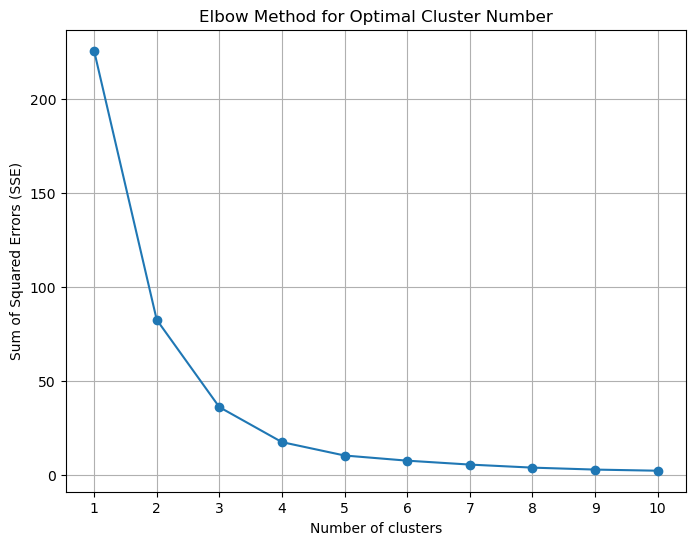

In [8]:
from sklearn.cluster import KMeans

# Create an array to store SSE values for different cluster numbers
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(y_df.values.reshape(-1, 1))
    sse.append(kmeans.inertia_)


# Plotting the elbow curve
plt.figure(figsize = (8,6))
plt.plot(range(1, 11), sse, marker = 'o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.savefig('Elbow Method.png', dpi = 300)
plt.show()

In [16]:
# y_df Categorized

kmeans = KMeans(n_clusters = 5, random_state = 42)
y_clusters = kmeans.fit_predict(y_df.values.reshape(-1, 1))

y_df_binarized = y_clusters

In [36]:
# Remapping
mapping = {1: 0, 0: 0, 3: 0, 5: 0, 2: 1, 4: 1} # 0 : Low, 1: High
y_df_binarized = np.vectorize(mapping.get)(y_df_binarized)

In [37]:
from collections import Counter

Counter(y_df_binarized)

Counter({0: 340, 1: 17})

In [632]:
#y_df.sort_values(ascending = False).to_excel('y_df.xlsx')

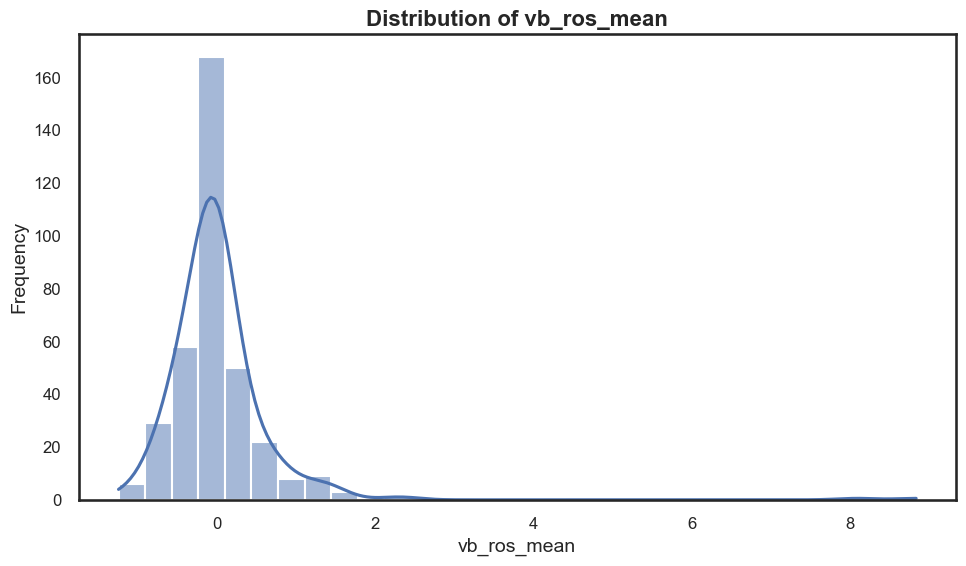

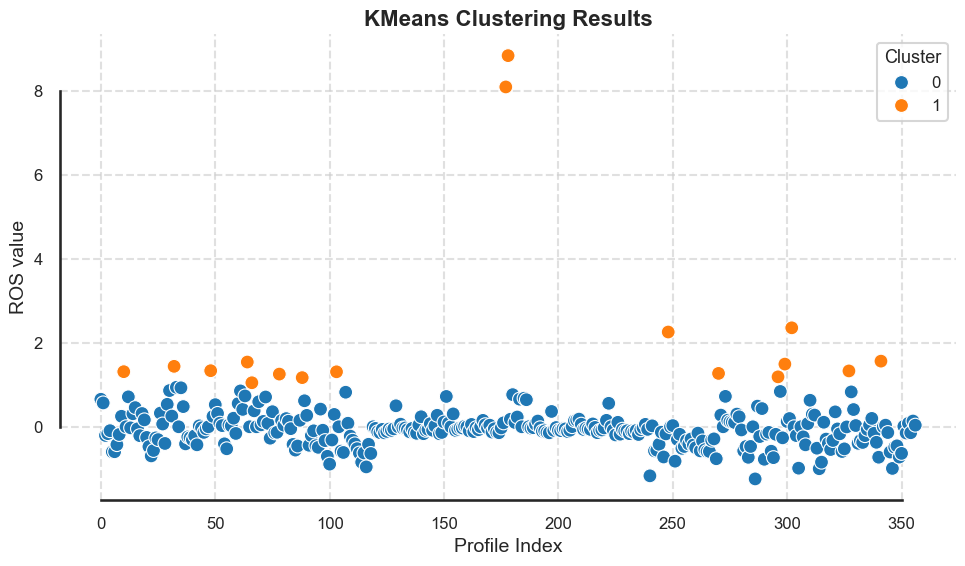

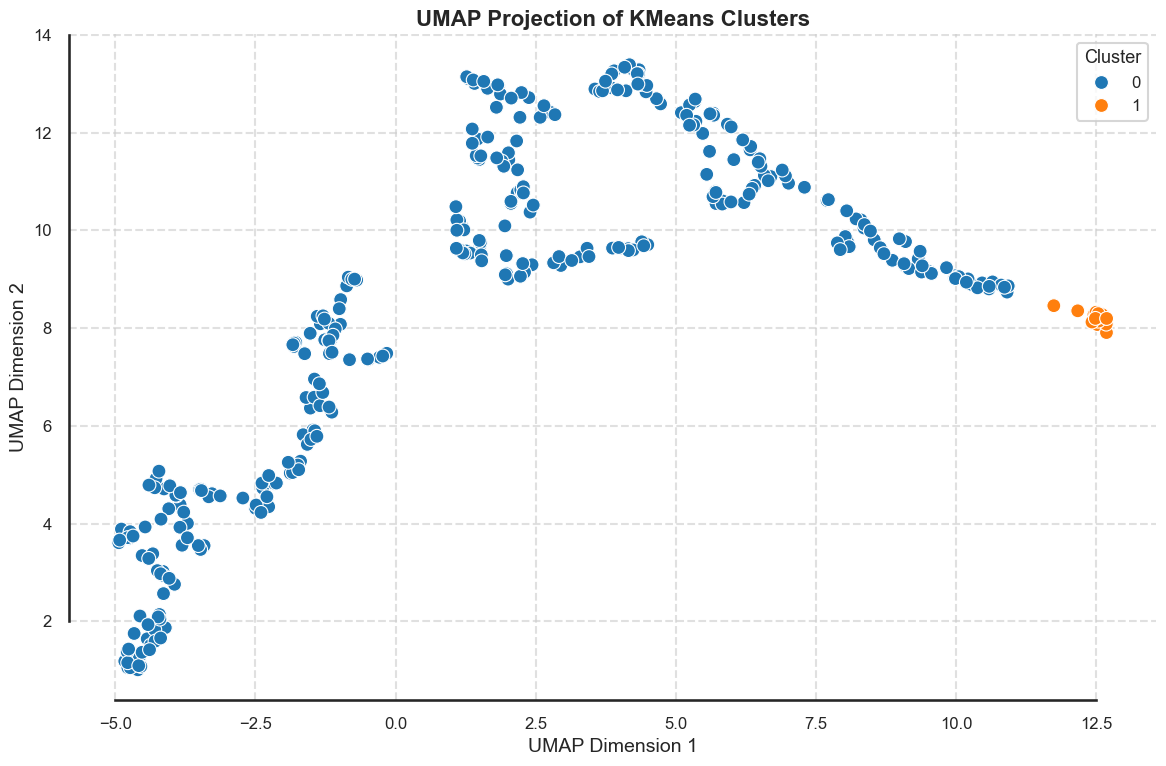

In [103]:
import seaborn as sns
import umap

# style setting
sns.set(style='white', context='talk')

# Data distribution check
plt.figure(figsize=(10, 6))
sns.histplot(y_f['vb_ros_mean'], bins=30, kde=True)
plt.title('Distribution of vb_ros_mean', fontsize=16, weight='bold')
plt.xlabel('vb_ros_mean', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Data distribution.png', dpi = 300)
plt.show()

# Standard deviation of ros value
std_dev = y_f['vb_ros_mean'].std()

# Noise 
noise_magnitude = 0.3 * std_dev

# Synthetic feature 
y_f['synthetic_feature'] = y_f['vb_ros_mean'] + np.random.normal(0, noise_magnitude, size=y_f.shape[0])

# Cluster labels
y_f['cluster'] = y_df_binarized

# KMeans Clustering Results plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=y_f, x=y_f.index, y='vb_ros_mean', hue='cluster', palette='tab10', marker='o', s=100)
plt.title('KMeans Clustering Results', fontsize=16, weight='bold')
plt.xlabel('Profile Index', fontsize=14)
plt.ylabel('ROS value', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cluster', title_fontsize='13', fontsize='12', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('Kmean.png', dpi = 300)
plt.show()

# UMAP transformation
umap_model = umap.UMAP(n_neighbors=17, min_dist=0.1, metric='euclidean')
y_umap = umap_model.fit_transform(y_f[['vb_ros_mean', 'synthetic_feature']])

# Add UMAP results to DataFrame
y_f['umap_1'] = y_umap[:, 0]
y_f['umap_2'] = y_umap[:, 1]

# UMAP results plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=y_f, x='umap_1', y='umap_2', hue='cluster', palette='tab10', marker='o', s=100)
plt.title('UMAP Projection of KMeans Clusters', fontsize=16, weight='bold')
plt.xlabel('UMAP Dimension 1', fontsize=14)
plt.ylabel('UMAP Dimension 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cluster', title_fontsize='13', fontsize='12', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('UMAP.png', dpi = 300)
plt.show()


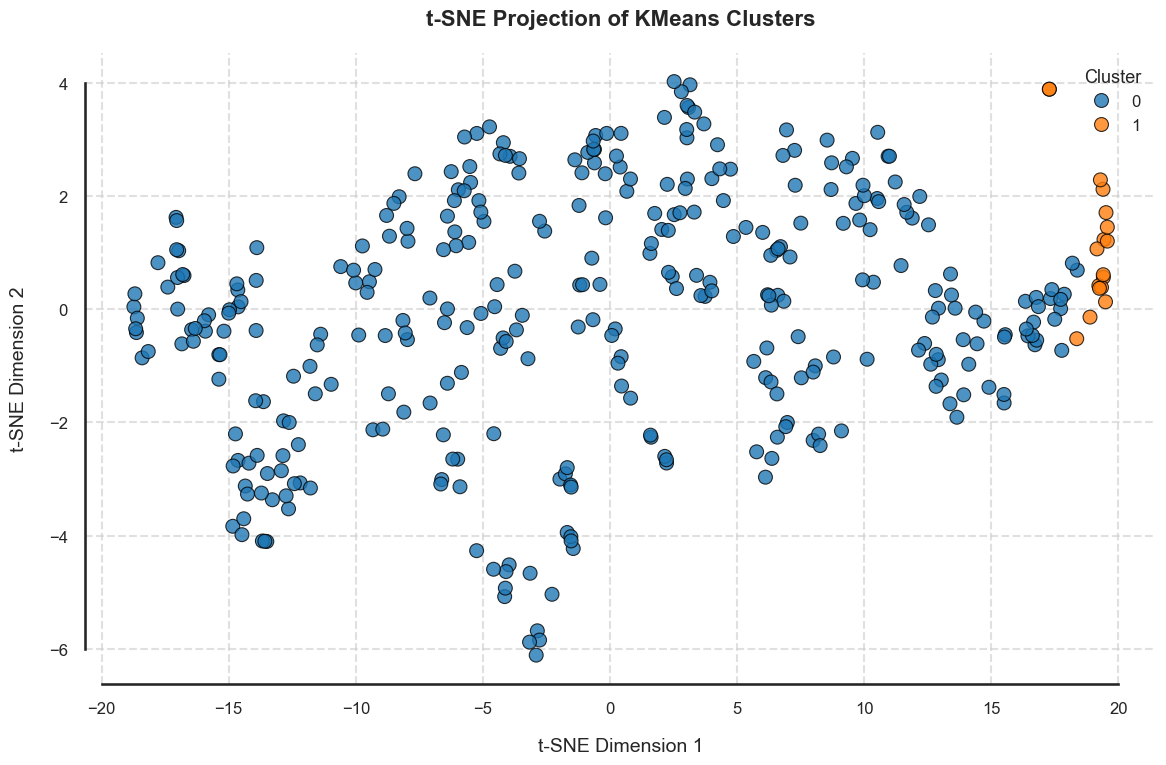

In [102]:
from sklearn.manifold import TSNE

# Fit and transform the data using t-SNE
tsne_model = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
y_tsne = tsne_model.fit_transform(y_f[['vb_ros_mean', 'synthetic_feature']])

# Add t-SNE results to the dataframe
y_f['tsne_1'] = y_tsne[:, 0]
y_f['tsne_2'] = y_tsne[:, 1]

# Plot t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=y_f, x='tsne_1', y='tsne_2', hue='cluster', palette='tab10', marker='o', s=100, edgecolor='black', alpha=0.8)
plt.title('t-SNE Projection of KMeans Clusters', fontsize=16, weight='bold', pad=20)
plt.xlabel('t-SNE Dimension 1', fontsize=14, labelpad=15)
plt.ylabel('t-SNE Dimension 2', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cluster', title_fontsize='13', fontsize='12', loc='upper right', frameon=False)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('t-SNE.png', dpi = 300)
plt.show()


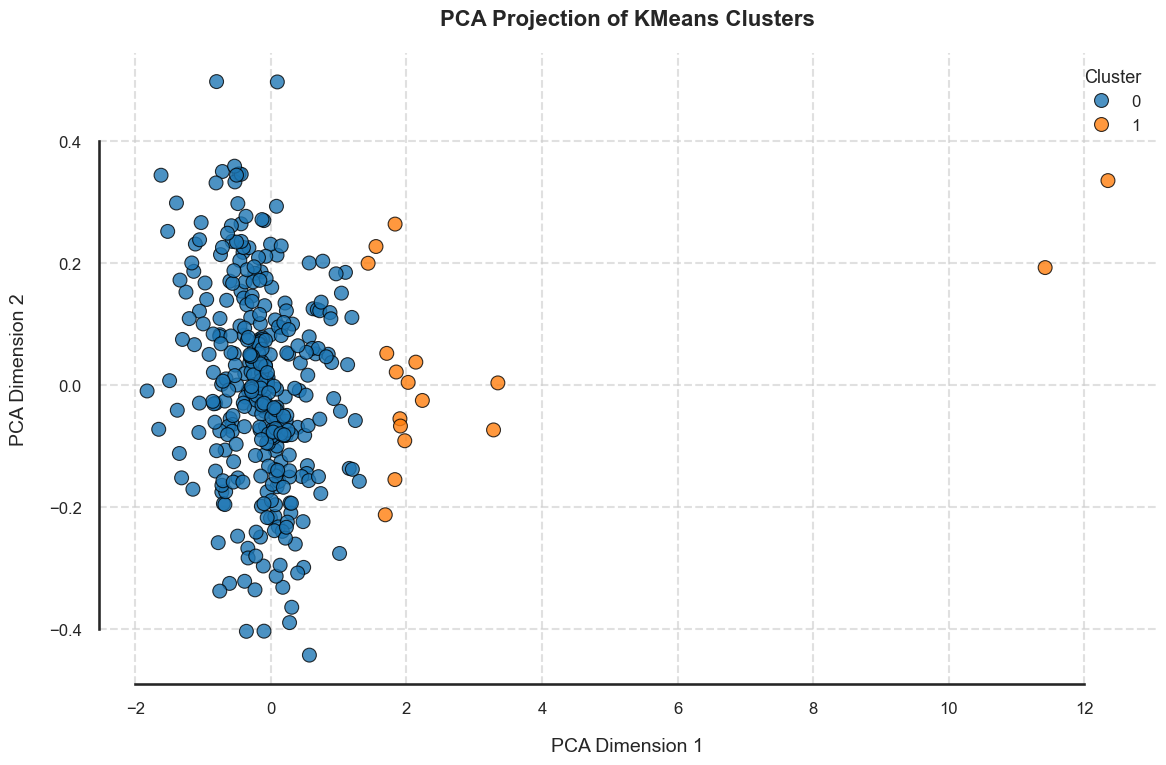

In [105]:
from sklearn.decomposition import PCA

# PCA fit
pca_model = PCA(n_components=2)
y_pca = pca_model.fit_transform(y_f[['vb_ros_mean', 'synthetic_feature']])

# PCA results
y_f['pca_1'] = y_pca[:, 0]
y_f['pca_2'] = y_pca[:, 1]

# PCA results visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(data=y_f, x='pca_1', y='pca_2', hue='cluster', palette='tab10', marker='o', s=100, edgecolor='black', alpha=0.8)
plt.title('PCA Projection of KMeans Clusters', fontsize=16, weight='bold', pad=20)
plt.xlabel('PCA Dimension 1', fontsize=14, labelpad=15)
plt.ylabel('PCA Dimension 2', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cluster', title_fontsize='13', fontsize='12', loc='upper right', frameon=False)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('PCA.png', dpi = 300)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# 3. Oversampling (SMOTE)

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_sample_weight

# Data Split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df_binarized, test_size = 0.3, random_state = 42, shuffle  = True)


# Over Sampleing
smote = SMOTE(random_state = 42)

X_train_s, y_train_s = smote.fit_resample(X_train, y_train)

# Data Flatten
y_train_s = np.ravel(y_train_s)
y_test = np.ravel(y_test)


# 4. Classification Model Formation & Check Accuracy

## Oversampling (o) / Model weights (o)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

class_weights = {0: 1.0, 1: 7.0}

# Models Dictionary
models = {
    'RandomForest': RandomForestClassifier(random_state=42, class_weight= class_weights),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, class_weight= class_weights),
    'LogisticRegression': LogisticRegression(random_state=42, class_weight= class_weights),
    'SGDClassifier': SGDClassifier(random_state=42, class_weight= class_weights),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42, class_weight= class_weights)
}

# models parameters setting
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1','l2']
    },
    'SGDClassifier': {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'penalty': ['l1', 'l2']
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'GaussianNB': {}, 
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
}

# Best Parameter searching
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train_s, y_train_s)
    
    # Show Best Parameters
    print(f"Best Parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best Cross-validation Accuracy for {model_name}: {grid_search.best_score_:.4f}")
    
    # Prediction with optimal model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store ersults in the dictionary
    results[model_name] = {
        'accuracy' : test_accuracy,
        'mse' : mse
    }
    
    # Assesment score present
    print(f"\nTest Accuracy for {model_name}: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------")

# Accuracy 
print("\nTest Accuracy Results:")
for model_name, metrics in results.items():
    print(f"{model_name} Accuracy : {metrics['accuracy']: .4f}, MSE : {metrics['mse']: .2f}")

Training RandomForest...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for RandomForest:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-validation Accuracy for RandomForest: 0.9787

Test Accuracy for RandomForest: 0.9444
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       105
           1       0.00      0.00      0.00         3

    accuracy                           0.94       108
   macro avg       0.49      0.49      0.49       108
weighted avg       0.94      0.94      0.94       108

---------------------------------------
Training GradientBoosting...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters for GradientBoosting:
{'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-valida

## Oversampling (x) / Model Weights (o)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


# Models Dictionary
models = {
    'RandomForest': RandomForestClassifier(random_state=42, class_weight= class_weights),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, class_weight= class_weights),
    'LogisticRegression': LogisticRegression(random_state=42, class_weight= class_weights),
    'SGDClassifier': SGDClassifier(random_state=42, class_weight= class_weights),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42, class_weight= class_weights)
}

# models parameters setting
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1','l2']
    },
    'SGDClassifier': {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'penalty': ['l1', 'l2']
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'GaussianNB': {}, 
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
}

# Best Parameter searching
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Show Best Parameters
    print(f"Best Parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best Cross-validation Accuracy for {model_name}: {grid_search.best_score_:.4f}")
    
    # Prediction with optimal model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store ersults in the dictionary
    results[model_name] = {
        'accuracy' : test_accuracy,
        'mse' : mse
    }
    
    # Assesment score present
    print(f"\nTest Accuracy for {model_name}: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------")

# Accuracy 
print("\nTest Accuracy Results:")
for model_name, metrics in results.items():
    print(f"{model_name} Accuracy : {metrics['accuracy']: .4f}, MSE : {metrics['mse']: .2f}")

Training RandomForest...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for RandomForest:
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-validation Accuracy for RandomForest: 0.9518

Test Accuracy for RandomForest: 0.9722
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       105
           1       0.00      0.00      0.00         3

    accuracy                           0.97       108
   macro avg       0.49      0.50      0.49       108
weighted avg       0.95      0.97      0.96       108

---------------------------------------
Training GradientBoosting...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters for GradientBoosting:
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-valid

## Oversampling(o) / Model Weights (x)

In [34]:
# Models Dictionary
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'SGDClassifier': SGDClassifier(random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# models parameters setting
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1','l2']
    },
    'SGDClassifier': {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'penalty': ['l1', 'l2']
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'GaussianNB': {}, 
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
}

# Best Parameter searching
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train_s, y_train_s)
    
    # Show Best Parameters
    print(f"Best Parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best Cross-validation Accuracy for {model_name}: {grid_search.best_score_:.4f}")
    
    # Prediction with optimal model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store ersults in the dictionary
    results[model_name] = {
        'accuracy' : test_accuracy,
        'mse' : mse
    }
    
    # Assesment score present
    print(f"\nTest Accuracy for {model_name}: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------")

# Accuracy 
print("\nTest Accuracy Results:")
for model_name, metrics in results.items():
    print(f"{model_name} Accuracy : {metrics['accuracy']: .4f}, MSE : {metrics['mse']: .2f}")

Training RandomForest...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for RandomForest:
{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-validation Accuracy for RandomForest: 0.9957

Test Accuracy for RandomForest: 0.9537
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.00      0.00      0.00         3

    accuracy                           0.95       108
   macro avg       0.49      0.49      0.49       108
weighted avg       0.94      0.95      0.95       108

---------------------------------------
Training GradientBoosting...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters for GradientBoosting:
{'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-validati

# 5. Deep Learning Model Formation & Check Accuracy

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [51]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Setting same seed number
tf.random.set_seed(42)


# Compute sample weights
class_weights_dict = {0: 1, 1: 7}
sample_weights = compute_sample_weight(class_weight = class_weights_dict, y = y_train_s)

# Optimizer
optimizer = Adam(learning_rate=0.001)

# Model define
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape = (X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Model Compile
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │        94,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,217 (411.00 KB)

 Trainable params: 105,217 (411.00 KB)

 Non-trainable params: 0 (0.00 B)

## Oversampling(o) / Sample Weights(o)

In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Early Stopping 
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Best model save
checkpoint_callback = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

tf.random.set_seed(42)
# Model FIT
history = model.fit(X_train_s, y_train_s,
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, checkpoint_callback],
                    sample_weight=sample_weights)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5807 - loss: 2.1557 - val_accuracy: 0.5463 - val_loss: 1.0916
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7378 - loss: 0.9735 - val_accuracy: 0.7037 - val_loss: 0.8370
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8295 - loss: 0.7173 - val_accuracy: 0.7778 - val_loss: 0.4861
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9067 - loss: 0.4208 - val_accuracy: 0.7870 - val_loss: 0.5454
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9084 - loss: 0.3376 - val_accuracy: 0.8889 - val_loss: 0.3344
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9460 - loss: 0.2600 - val_accuracy: 0.8981 - val_loss: 0.2519
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9502 - loss: 0.2814 - val_accuracy: 0.8704 - val_loss: 0.3636
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9743 - loss: 0.1483 - val_accuracy: 0.8426 - 

## Oversampling(x) / Sample Weights (o)

In [55]:
from tensorflow.keras.callbacks import ModelCheckpoint


# Compute sample weights
class_weights_dict = {0: 3, 1: 10}
sample_weights = compute_sample_weight(class_weight = class_weights_dict, y = y_train)
# Early Stopping 
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Best model save
checkpoint_callback = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

tf.random.set_seed(42)
# Model FIT
history = model.fit(X_train, y_train,
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, checkpoint_callback],
                    sample_weight=sample_weights)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9973 - loss: 0.0614 - val_accuracy: 0.9259 - val_loss: 0.4073
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9951 - loss: 0.3655 - val_accuracy: 0.9074 - val_loss: 0.4555
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9753 - loss: 0.2147 - val_accuracy: 0.9352 - val_loss: 0.3456
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9903 - loss: 0.1272 - val_accuracy: 0.9352 - val_loss: 0.3557
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9980 - loss: 0.0657 - val_accuracy: 0.9259 - val_loss: 0.3938
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0981 - val_accuracy: 0.9352 - val_loss: 0.4149
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9924 - loss: 0.0936 - val_accuracy: 0.9259 - val_loss: 0.4509
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9954 - loss: 0.0999 - val_accuracy: 0.9352 - val_loss: 0.4463

## Oversampling(o) / Sample Weights(x)

In [64]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Early Stopping 
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Best model save
checkpoint_callback = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

tf.random.set_seed(42)
# Model FIT
history = model.fit(X_train_s, y_train_s,
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, checkpoint_callback])

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 3.3430e-04 - val_accuracy: 0.8981 - val_loss: 0.9281
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.0918e-04 - val_accuracy: 0.8981 - val_loss: 0.9319
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.9747e-04 - val_accuracy: 0.8981 - val_loss: 0.9366
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.1148e-04 - val_accuracy: 0.8981 - val_loss: 0.9389
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.3659e-04 - val_accuracy: 0.8981 - val_loss: 0.9420
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.6039e-04 - val_accuracy: 0.8981 - val_loss: 0.9445
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.8128e-04 - val_accuracy: 0.8981 - val_loss: 0.9456
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.610

## Deep Learning Model Results

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9020 - loss: 0.7710  
Test Accuracy of the Best Model: 0.8981
Test loss of the Best Model :  0.9281


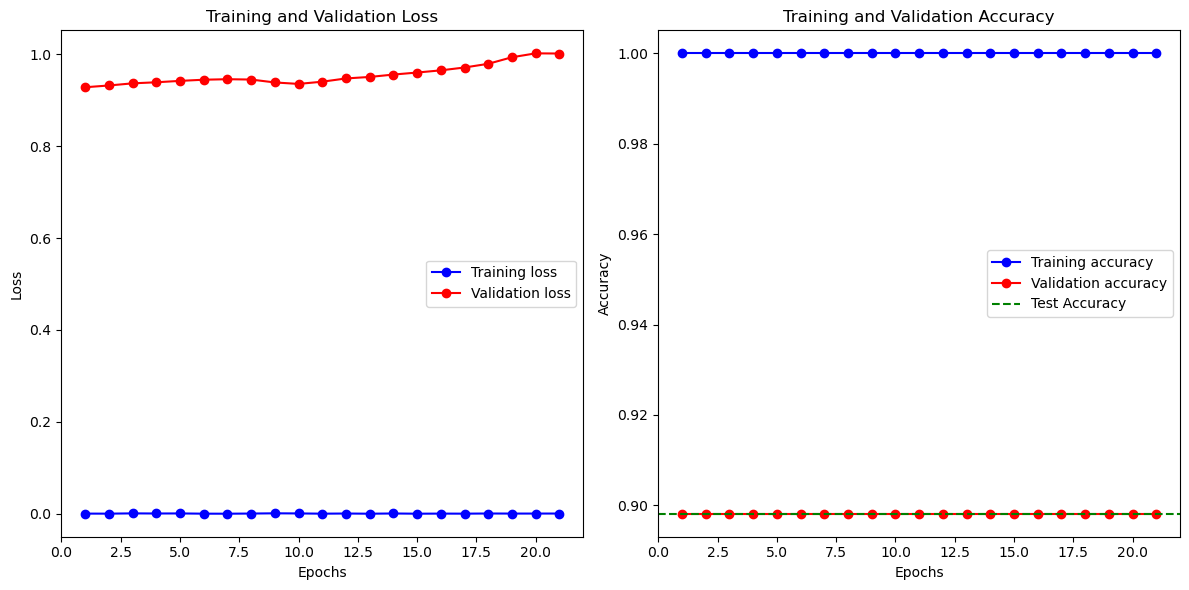

In [68]:
# Save Best Model
best_model = keras.models.load_model('best_model.keras')

# Test data evaluation
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

print(f'Test Accuracy of the Best Model: {test_accuracy:.4f}')
print(f'Test loss of the Best Model : {test_loss: .4f}')

# Assesment scores
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# plotting
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.axhline(y=test_accuracy, color='g', linestyle='--', label='Test Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('Deep learning results.png')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


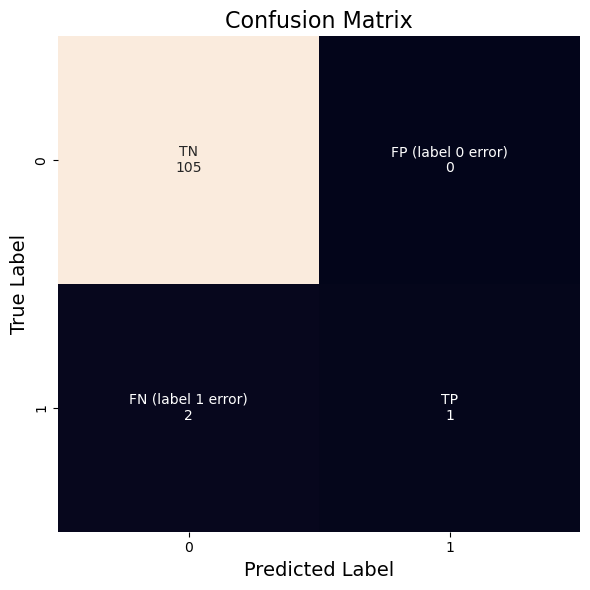

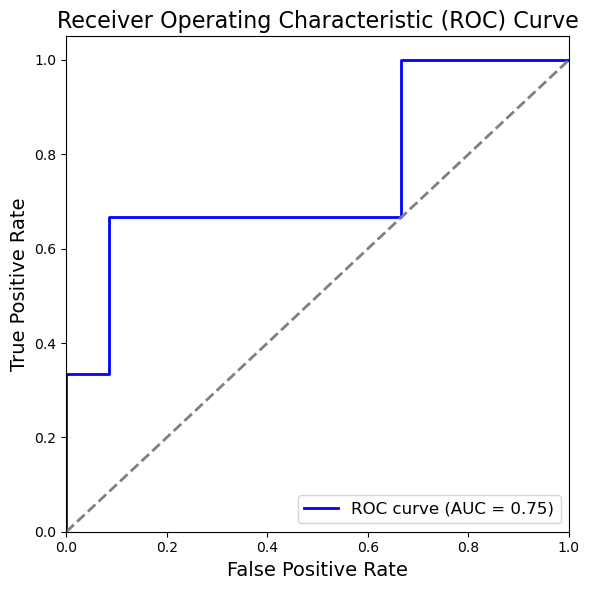

In [70]:
# Confusion Matirx & ROC Curve
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Load Best Model
best_model = keras.models.load_model('best_model.keras')

# Confusion Matrix
y_pred = best_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_classes)


# Annotation 
group_names = ['TN', 'FP (label 0 error)', 'FN (label 1 error)', 'TP']
group_counts = [value for value in conf_matrix.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (6,6))
sns.heatmap(conf_matrix, annot = labels, fmt = '', cbar = False, color = 'Blue')
plt.title('Confusion Matrix', fontsize = 16)
plt.xlabel('Predicted Label', fontsize = 14)
plt.ylabel('True Label', fontsize = 14)
plt.tight_layout()
plt.savefig('Confusion Matrix.png', dpi = 300)
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.legend(loc='lower right', fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.tight_layout()
plt.savefig('ROC_Curve.png', dpi=300)
plt.show()

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      0.33      0.50         3

    accuracy                           0.98       108
   macro avg       0.99      0.67      0.75       108
weighted avg       0.98      0.98      0.98       108



# 6. Prediction with validation dataset

In [5]:
# Load Validation Data
x_val_df = pd.read_csv('x_val_df.csv')
x_val_df = x_val_df.iloc[:, 1:]
x_val_df

,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_Orientation,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_3_3,Cells_AreaShape_Zernike_4_0,...,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_ER_5_0,Nuclei_Texture_SumEntropy_Mito_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_AGP_5_0,Nuclei_Texture_SumVariance_DNA_10_0,Nuclei_Texture_SumVariance_DNA_5_0,Nuclei_Texture_Variance_AGP_5_0,Nuclei_Texture_Variance_DNA_10_0,Nuclei_Texture_Variance_DNA_5_0
0,0.001517,0.277820,0.504330,0.872770,-0.062229,-0.097463,-0.136418,1.363021,-0.121675,0.111071,...,0.012441,-0.515965,-0.125886,0.378361,-0.192612,0.263924,0.134799,-0.065563,0.159910,0.150347
1,0.034036,0.090993,0.306434,0.485507,0.052555,-0.031708,-0.116941,0.108810,-0.257286,0.182884,...,0.148373,-0.708293,-0.168461,0.159921,0.005949,0.278903,0.181974,0.119256,0.289176,0.263372
2,-0.418352,-0.452332,0.874477,-0.128444,0.677804,0.464805,0.139284,0.689670,0.092896,-0.396120,...,1.174464,1.873223,0.559107,1.438213,1.659821,1.049936,1.254289,0.822218,1.143912,1.200041
3,-0.302987,-0.107649,0.926159,0.397246,0.287252,-0.666721,0.485750,0.286509,-0.249060,0.851031,...,0.402387,-0.358765,-0.296739,0.925500,-0.294972,0.741252,0.544289,-0.375331,0.497514,0.527436
4,1.015297,0.971762,-0.344257,0.236280,-0.908705,0.246192,-1.322807,0.577879,-0.200651,0.544807,...,1.195175,-0.566205,-0.462147,0.560941,-0.435885,1.580252,1.477814,-0.779816,1.448586,1.502258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30612,-0.265613,-0.433268,0.493264,-0.545809,0.505944,-0.235360,0.530636,0.305867,-0.243942,-0.247084,...,-0.166256,-0.606686,-1.410230,-1.127026,-0.063554,-0.134207,-0.174389,0.904218,-0.093846,-0.130101
30613,-0.210157,-0.305976,0.503456,-0.028201,0.453887,0.195480,0.276551,0.262468,0.886899,-0.258701,...,-0.326757,-0.692443,-1.197271,-1.103457,0.064433,-0.189828,-0.262928,0.950440,-0.374726,-0.343942
30614,0.597644,0.486508,-0.388333,-0.393189,-0.434949,0.348865,-0.739404,-0.280500,0.231109,-0.160809,...,0.281298,-0.558976,-0.394671,-0.123102,-0.271379,0.429285,0.213798,-0.222311,0.061249,0.132184
30615,0.806925,0.851465,-0.373886,0.048235,-0.452466,-0.217211,-0.818209,0.555877,0.007761,0.535272,...,0.762975,-1.044746,-0.611885,0.340107,-0.832198,0.986590,0.869581,-1.017756,0.612146,0.618390


In [7]:
# Validation
y_pred_prob = best_model.predict(x_val_df)

# prediction rate cutoff x > 0.5 : 1
y_pred = (y_pred_prob > 0.5).astype(int)

957/957 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


In [9]:
# Load Metadata
x_val_dff = pd.read_csv('x_val_dff.csv')
x_val_dff = x_val_dff.iloc[:, 1:]

In [10]:
# Check location of DNA Damage High Labeld Data
hit_comp = np.flatnonzero(y_pred != 0)

In [11]:
comp_name = []
for idx in hit_comp:
    value = x_val_dff.loc[idx, 'Metadata_broad_sample']
    name = chem_dat[chem_dat['BROAD_ID'] == value]['CPD_NAME'].tolist()
    comp_name.append(name)


# Remove DMSO
comp_name = [v for v in comp_name if v]

comp_name = [item for sublist in comp_name for item in sublist]

print(len(comp_name))
print(display(comp_name))

2991


['BRD-A02850421',
 'BRD-A03182941',
 'BRD-A03668899',
 'BRD-A03764094',
 'BRD-A03958649',
 'BRD-A05956997',
 'BRD-A06158172',
 'terfenadine',
 'BRD-A06808784',
 'BRD-A07944983',
 'BRD-A09796989',
 'BRD-A10482588',
 'BRD-A14331394',
 'BRD-A16504062',
 'brefeldin A',
 'BRD-A20477000',
 'BRD-A22773530',
 'vinblastine sulfate',
 'BRD-A25993094',
 'puromycin',
 'BRD-A26738626',
 'BRD-A27966268',
 'BRD-A31835455',
 'BRD-A32999156',
 'BRD-A33355319',
 'BRD-A34461624',
 'proscillaridin',
 'BRD-A36171447',
 'BRD-A37739876',
 'anthothecol',
 'BRD-A38040920',
 'BRD-A38153724',
 'BRD-A39837162',
 'BRD-A40929095',
 'BRD-A41199690',
 'cantharidin',
 'dihydrogambogic acid',
 'BRD-A45909191',
 'BRD-A46317335',
 'colchicine',
 'BRD-A47416464',
 'BRD-A48801944',
 'tetrindole',
 'Ro 106-9920',
 'KF 38789',
 'CA-074-Me',
 'BRD-A56141348',
 'BRD-A60076435',
 'BRD-A60323925',
 'BRD-A64499703',
 'BRD-A64761364',
 'BRD-A65183678',
 'BRD-A65592966',
 'BRD-A67565174',
 'BRD-A68766327',
 'BRD-A68949340',
 'BRD-A

None


In [ ]:
comp_list = pd.DataFrame()
for idx in hit_comp:
    value = x_val_dff.loc[idx, 'Metadata_broad_sample']
    name = chem_dat[chem_dat['BROAD_ID'] == value]

    comp_list = pd.concat([comp_list, name], ignore_index = True)



comp_list.to_excel('comp_list.xlsx')